In [1]:
%env KERAS_BACKEND=tensorflow 
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

env: KERAS_BACKEND=tensorflow
TensorFlow 1.x selected.
1.15.2


In [2]:
import numpy as np
import matplotlib.pyplot as plt

import cv2 as cv 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
## use magic word to change the path 
%ls
%cd drive/My\ Drive/Colab\ Notebooks/rs_image_class
%ls

In [ ]:
data_path = ('./srcdata2/data/')
label_path = ('./srcdata2/label/')


In [ ]:
def getdata(path, name_base, datatype, img_num, IsGrey):
  if(IsGrey):
    wholeData = np.zeros((img_num,50,50), dtype=float);
  else:
    wholeData = np.zeros((img_num,50,50,3), dtype=float);
  for i in range(1, img_num):
    fname = path+name_base+str(i)+'.'+datatype
    if(IsGrey):
      data = cv.imread(fname, 0)
    else:
      data = cv.imread(fname)
    ##data_np = np.zeros((50, 50, 3), dtype=float)
    ##data_np = data
    ##data_reshape = data_np.reshape(50, 150) 
    wholeData[i] = data;
  return wholeData
      

In [ ]:
WholeData3band = getdata(data_path, 'src_', 'bmp', 576, 0)
WholeLabel3band = getdata(label_path, '', 'bmp', 576, 1)
print(WholeData3band.shape)
print(WholeLabel3band.shape)

#將影像整理成各個array存在上面了
#將下來要拆分training data 和 testing data, x 是wholedata, y 是wholelabel

In [ ]:
# band8
fname = './srcdata2/band8/msDRquartband8.bmp'
WholeDataband8 = cv.imread(fname,0)
band8 = WholeDataband8[0:1200, 0:1200]
print(band8.shape)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(WholeData3band, WholeLabel3band, test_size=0.2)


In [ ]:
y_train.shape

In [ ]:
##print(x_train[10])
plt.imshow(np.uint(x_train[10]))


In [ ]:
from keras.utils import np_utils

y_train_onehot = np_utils.to_categorical(y_train, 3)
y_test_onehot = np_utils.to_categorical(y_test, 3)

shape_y_train_onehot = y_train_onehot.shape
shape_y_test_onehot = y_test_onehot.shape

print(shape_y_train_onehot)
print(shape_y_test_onehot)

In [ ]:
y_test_onehot_reshape = y_test_onehot.reshape([116*2500, 3])
y_train_onehot_reshape = y_train_onehot.reshape([460*2500,3])
x_train_reshape = x_train.reshape([460*50*50, 3])
x_test_reshape = x_test.reshape([116*50*50,3])

shape_y_test_onehot_reshape = y_test_onehot_reshape.shape
shape_y_train_onehot_reshape = y_train_onehot_reshape.shape
shape_x_train_reshape = x_train_reshape.shape
shape_x_test_reshape = x_test_reshape.shape


In [ ]:
print(x_train_reshape.shape)
print(y_train_onehot_reshape.shape)
print(x_test_reshape.shape)
print(y_test_onehot_reshape.shape)

(1150000, 3)
(1150000, 3)
(290000, 3)
(290000, 3)


In [ ]:
from keras.models import Sequential #標準型神經網路
from keras.layers import Dense, Activation #Dense 指的是神經網路形式為fully connected
from keras.optimizers import SGD, Adam #選擇方法去學習 SGD隨機型學習 -> 就是常用的 gradient descent 

# NN model function
def NN_model():
  model = Sequential(name="NN")
  model.add(Dense(500, input_dim=3, name='Dense1'))
  model.add(Activation('relu', name='Activation1_sigmoid'))
  model.add(Dense(500, name='Dense2'))
  model.add(Activation('relu', name='Activation2_relu'))
  model.add(Dense(3, name='Dense_3_for_class'))
  model.add(Activation('softmax', name='Activation3_softmax'))
  return model

In [ ]:
nn_model = NN_model()
nn_model.compile(loss='mse', optimizer=SGD(lr=0.0001),
             metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
nn_model.summary()


Model: "NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense1 (Dense)               (None, 500)               2000      
_________________________________________________________________
Activation1_sigmoid (Activat (None, 500)               0         
_________________________________________________________________
Dense2 (Dense)               (None, 500)               250500    
_________________________________________________________________
Activation2_relu (Activation (None, 500)               0         
_________________________________________________________________
Dense_3_for_class (Dense)    (None, 3)                 1503      
_________________________________________________________________
Activation3_softmax (Activat (None, 3)                 0         
Total params: 254,003
Trainable params: 254,003
Non-trainable params: 0
__________________________________________________________

In [ ]:
#x_train.shape
#y_train.shape
history = nn_model.fit(x_train_reshape, y_train_onehot_reshape, validation_split=0.2, batch_size=32, epochs=10
                    )


Train on 920000 samples, validate on 230000 samples
Epoch 1/10
920000/920000 [==============================] - 137s 149us/step - loss: 0.2135 - accuracy: 0.6441 - val_loss: 0.1577 - val_accuracy: 0.7025
Epoch 2/10
920000/920000 [==============================] - 135s 147us/step - loss: 0.1324 - accuracy: 0.7535 - val_loss: 0.0243 - val_accuracy: 0.9756
Epoch 3/10
920000/920000 [==============================] - 141s 153us/step - loss: 0.0188 - accuracy: 0.9731 - val_loss: 0.0147 - val_accuracy: 0.9783
Epoch 4/10
920000/920000 [==============================] - 149s 162us/step - loss: 0.0153 - accuracy: 0.9743 - val_loss: 0.0133 - val_accuracy: 0.9789
Epoch 5/10
920000/920000 [==============================] - 142s 155us/step - loss: 0.0142 - accuracy: 0.9749 - val_loss: 0.0129 - val_accuracy: 0.9783
Epoch 6/10
920000/920000 [==============================] - 142s 154us/step - loss: 0.0137 - accuracy: 0.9751 - val_loss: 0.0125 - val_accuracy: 0.9781
Epoch 7/10
920000/920000 [=========

In [ ]:
score = nn_model.evaluate(x_test_reshape, y_test_onehot_reshape)

290000/290000 [==============================] - 12s 43us/step


In [ ]:
print('loss', score[0])
print('acc', score[1])


loss 0.014450217174669593
acc 0.9729275703430176


In [ ]:
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


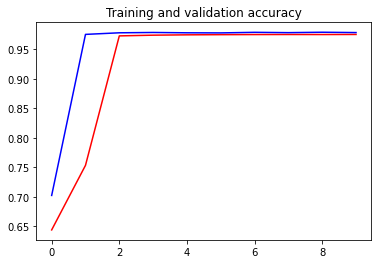

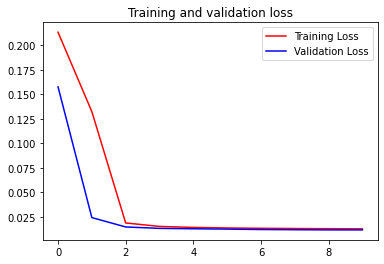

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model_cnn_json = nn_model.to_json()
open('classImg3_val09787_mse_SGD.json', 'w').write(model_cnn_json)
nn_model.save_weights('classImg3_val09787_mse_SGD.h5')

**Reload the pre-trained model**

In [ ]:
from keras.models import model_from_json
from keras.optimizers import SGD

model = model_from_json(open('classImg3_val09787_mse_SGD.json').read())
model.load_weights('classImg3_val09787_mse_SGD.h5')

In [ ]:
from sklearn.metrics import confusion_matrix


pred_confuse =  model.predict(x_test_reshape)
y_pred_confuse = np.argmax(pred_confuse,axis=1)


In [ ]:
print(y_pred_confuse)

y_test_confuse = y_test.reshape(290000, 1)
print(y_test_confuse)


[1 1 1 ... 1 1 1]
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


In [ ]:
confuse = confusion_matrix(y_test_confuse,y_pred_confuse ,labels=[0, 1, 2])


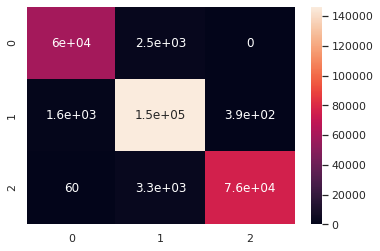

In [ ]:
import seaborn as sns;
sns.set()

sns.heatmap(confuse,annot=True)


* TP(True Positive)：將正類預測為正類數，真實為0，預測也為0
* FN(False Negative)：將正類預測為負類數，真實為0，預測為1
* FP(False Positive)：將負類預測為正類數， 真實為1，預測為0
* TN(True Negative)：將負類預測為負類數，真實為1，預測也為1
#### Precision : $\dfrac{TP}{TP+FP}$ -> close to 1 means FP small
#### Recall & Sensitivity : $\dfrac{TP}{TP+FN}$ -> close to 1 means FN small
#### Specitivity : $\dfrac{TN}{TN+FP}$
#### Accuracy : $\dfrac{TP+TN}{P+N}$



In [ ]:
TP = confuse[0][0]+confuse[1][1]+confuse[2][2]
FN = confuse[0][1]++confuse[0][2]confuse[1][0]+confuse[1][2]confuse[2][0]+confuse[2][1]

In [ ]:
cm = confuse
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

precision = TP.sum(axis=0) / (TP.sum(axis=0)+FP.sum(axis=0)) 
recall = TP.sum(axis=0) / (TP.sum(axis=0)+FN.sum(axis=0))  
specitivity = TN.sum(axis=0) / (TN.sum(axis=0)+FP.sum(axis=0)) 
precisionNP = TN.sum(axis=0) / (TN.sum(axis=0)+FN.sum(axis=0))  


In [ ]:
print(confuse)
print('precision = ' + str(precision))
print('recall = '+str(recall))
print('specitivity = ' + str(specitivity))
print('precisionNP = '+str(precisionNP))
print(FP.sum(axis=0), TP.sum(axis=0))
print(FN.sum(axis=0), TN.sum(axis=0))
print(cm.sum(axis=0).sum(axis=0))

[[ 59590   2529      0]
 [  1559 146185    387]
 [    60   3316  76374]]
precision = 0.9729275862068966
recall = 0.9729275862068966
specitivity = 0.9864637931034482
precisionNP = 0.9864637931034482
7851 282149
7851 572149
290000


In [ ]:
arr = np.array([[1, 2 , 3], [2, 2, 2]])
print(arr.sum(axis=0))
print(arr.sum(axis=1))


[3 4 5]
[6 6]


In [ ]:

# Precision
tp/(tp+fp)
# Recall
tp/(tp+fn)
# Recall的NP反過來 -> Specitivity
tn/(tn+fp)
# Precision NP反過來 -> 
tn/(tn+fn)

**The Difference Between `model.predict()` with `model.predict_classes()`** 




In [ ]:
pred = model.predict(x_test_reshape)


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(["0", "1", "2"])
predict = np.argmax(pred,axis=1)  #axis = 1是取行的最大值的索引，0是列的最大值的索引
inverted = encoder.inverse_transform([predict])
print(predict_test[0:3])
print(argmax(predict_test,axis=1))
print(inverted)


In [ ]:
print(pred.shape)
print(pred[0])

(110000, 3)
[9.9111485e-01 8.1131319e-03 7.7204144e-04]


In [ ]:
pred_class = model.predict_classes(x_test_reshape)

In [ ]:
from sklearn import preprocessing

predict_test = model.predict_classes(x_test_reshape).astype('int')
predict_test.shape



(110000,)

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(["0", "1", "2"])

LabelEncoder()

In [ ]:
list(encoder.classes_)
encoder.transform(['0', '1'])
list(encoder.inverse_transform([0,0]))

['0', '0']

In [ ]:
list_encoder = list(encoder.inverse_transform(predict_test))

In [ ]:
print(predict_test)


[0 0 0 ... 0 0 0]


In [ ]:
print(str(x_test.shape)+' y_test shape: '+str(y_test.shape))
print(x_test[0:10])
print(y_test[0:10])

In [ ]:
# verity the model correction

from sklearn.model_selection import train_test_split

x_train2, x_test2 , y_train2, y_test2 = train_test_split(WholeData3band, WholeLabel3band, test_size=0.3)


In [ ]:
print(str(x_test.shape)+' y_test shape: '+str(y_test.shape))
#print(y_test2[0][0][0][0])

(44, 50, 50, 3) y_test shape: (44, 50, 50)


In [ ]:
for o in range(10):
  for i in range(50):
    for j in range(50):
      #for k in range(3):
      if(y_train[o][i][j]==2):
        print('('+str(o)+','+str(i)+','+str(j)+')')


In [ ]:
for i in range(100000):
  if(y_train_onehot_reshape[i][1]>0):
    print('('+str(i)+')')
    print(y_train_onehot_reshape[i])

  

In [ ]:
print(x_train[8][2][7])
print(y_train[8][2][7])
print(y_train_onehot_reshape.shape)
print(y_train_onehot_reshape[20107])
print(x_train_reshape[20107])

[132. 111. 122.]
2.0
(1007500, 3)
[0. 0. 1.]
[132. 111. 122.]


In [ ]:
test_arr = np.array([[72, 62, 41]])
for i in range(100000):
  if(x_train_reshape[i][0] == 132 and x_train_reshape[i][1] == 111 and x_train_reshape[i][2] == 122):
    print(i)
    print(y_train_onehot_reshape[i])

20107
[0. 0. 1.]


In [ ]:
test_arr = np.array([[132, 111, 122]])
test_arr.shape

(1, 3)

In [ ]:
pred_test1 = nn_model.predict(test_arr)

In [ ]:
print(pred_test1)

[[0.9931023  0.00107027 0.00582744]]


In [ ]:
index = 0
arr = np.zeros([256*256*256, 3])
for i in range(256):
  for j in range(256):
    for k in range(256):
      arr[index] = [i, j, k]
      index+=1
  
print(arr.shape)

(16777216, 3)


In [ ]:
pred_arr = nn_model.predict(arr)


In [ ]:
a = 0
for i in range(16777216):
  if(pred_arr[i][0]< pred_arr[i][2]):
    a+=1

In [ ]:
print(a)

5448762


In [ ]:
# verify the data correction
'''
for o in range(20):
  for i in range(50):
    for j in range(50):
      for k in range(3):
        if(y_train_onehot_reshape[o][i][j][k]>0):
          print('('+str(o)+','+str(i)+','+str(j)+','+str(k)+')')
'''
j=1

for i in range(50000):
  if(y_train_onehot_reshape[i][j] == 1):
    print('('+str(i)+','+str(j)+')')
    print('x_train: '+str(x_train_reshape[i]))
    print('y_train: '+ str(y_train_onehot_reshape[i])+'\n')